# <u><b><i><center>DAP PROJECT - Analysing 2023 Annual Stack Overflow Survey Results </center></i></b></u>

In [180]:
import pandas as pd
from pandas import read_csv
import seaborn as sns 
import matplotlib.pyplot as plt
import operator
import re
import plotly.express as px

# CONFIGURATIONS 
pd.set_option('display.max_columns', 90)

## -- <i>DATA FILE SETTING UP AND CONFIGURATION</i> -- 


In [181]:
schema = read_csv('survey_results_schema.csv')
data = read_csv('survey_results_public.csv')

data.set_index('ResponseId', inplace=True)
data.rename(columns = {'CompTotal': 'Salary', 'ConvertedCompYearly': 'Total_Salary'}, inplace=True)

In [182]:
# DROP & CLEAN
data.drop(columns=['Q120'], inplace=True)

In [183]:
data.shape

(89184, 82)

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89184 entries, 1 to 89184
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MainBranch                           89184 non-null  object 
 1   Age                                  89184 non-null  object 
 2   Employment                           87898 non-null  object 
 3   RemoteWork                           73810 non-null  object 
 4   CodingActivities                     73764 non-null  object 
 5   EdLevel                              87973 non-null  object 
 6   LearnCode                            87663 non-null  object 
 7   LearnCodeOnline                      70084 non-null  object 
 8   LearnCodeCoursesCert                 37076 non-null  object 
 9   YearsCode                            87435 non-null  object 
 10  YearsCodePro                         66136 non-null  object 
 11  DevType                          

### <i>Custom Aggregate functions :- </i>

In [185]:
# Function to populate the dictionary
import pandas as pd
import operator

def populateDict(data: pd.core.series.Series, delimiter=';', dropna=True, sortbyVals=False):
    _dict = {}
    if dropna:
        data = data.dropna()

    for i in data:
        splitted = i.split(delimiter)
        for j in splitted:
            _dict[j] = _dict.get(j, 0) + 1

    if sortbyVals:
        _dict = dict(sorted(_dict.items(), key=operator.itemgetter(1), reverse=True))

    return _dict


### - <i>Distributions of survey participants according to their country</i> -

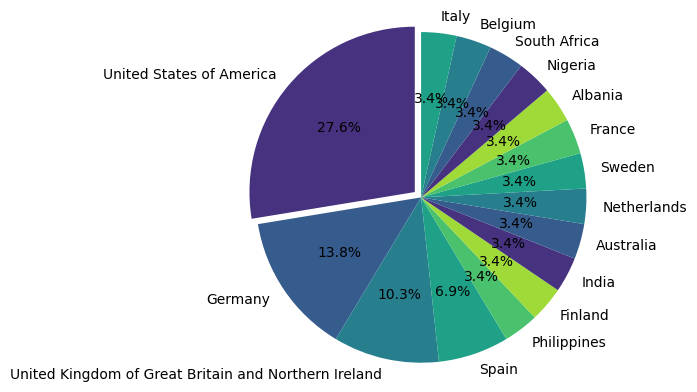

In [186]:
# took only first 20 values for better visualisation
consideration = 30
countryDistributions = dict(data['Country'].head(consideration).value_counts(normalize=True)) 
countries, counts = map(list, zip(*countryDistributions.items()))

# Wedge out first country
myExplode = [0.05 if i == 0  else 0 for i in range(len(countries))]

fig, ax = plt.subplots()
ax.pie(counts, labels=countries, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('viridis'), explode=myExplode
      )

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.show()


> <em> 
    CONCLUSIONS: From above observation we can see that most percentage of people who participated in the survey were from United States, followed by Germany, UK and Spain. We can also observe that countries from Philippines : Italy have participated in approximately same proportions (3.4%).
 <em>

### <i>*- Educations level of candidates who participated in survey -*</i>

<class 'pandas.core.series.Series'>


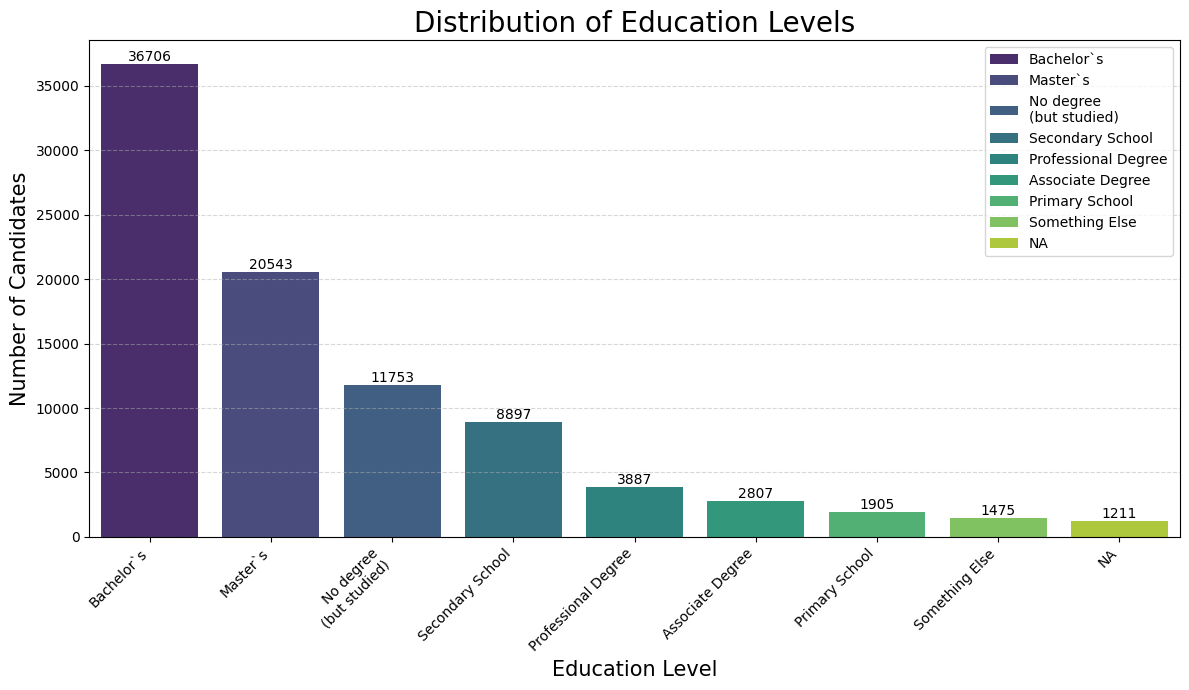

In [187]:
# data['EdLevel'].unique()

data['EdLevel'].fillna("NA", inplace=True)
educationData = data['EdLevel']

print(type(educationData))

# educationCounts = {}
# for i in data['EdLevel']:
#     educationCounts[i] = educationCounts.get(i, 0) + 1

# # Sorting Dictionary
# educationCounts = sorted(educationCounts.items(), key=operator.itemgetter(1), reverse=True)

educationCounts = populateDict(educationData, ';', sortbyVals=True)

levels, counts = map(list, zip(*educationCounts.items()))

# Custom labels for better readability
custom_labels = ['Bachelor`s',
                 'Master`s',
                 'No degree\n(but studied)',
                 'Secondary School',
                 'Professional Degree',
                 'Associate Degree',
                 'Primary School',
                 'Something Else',
                 'NA']

# Create a Seaborn bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=custom_labels, y=counts, hue=custom_labels, palette="viridis", dodge=False, legend=True)

# Adding data labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel("Education Level", fontsize=15)
plt.ylabel("Number of Candidates", fontsize=15)
plt.title("Distribution of Education Levels", fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

> <em> 
    CONCLUSIONS: 
    Candidates With Bacherlor`s degree were the one`s who participated most in the survey along with Master`s degree holders, more dominant in survey and seem to be using the platform to a larger Extent. <em>

### <i>*- Age Distributions of Candidates -*</i>

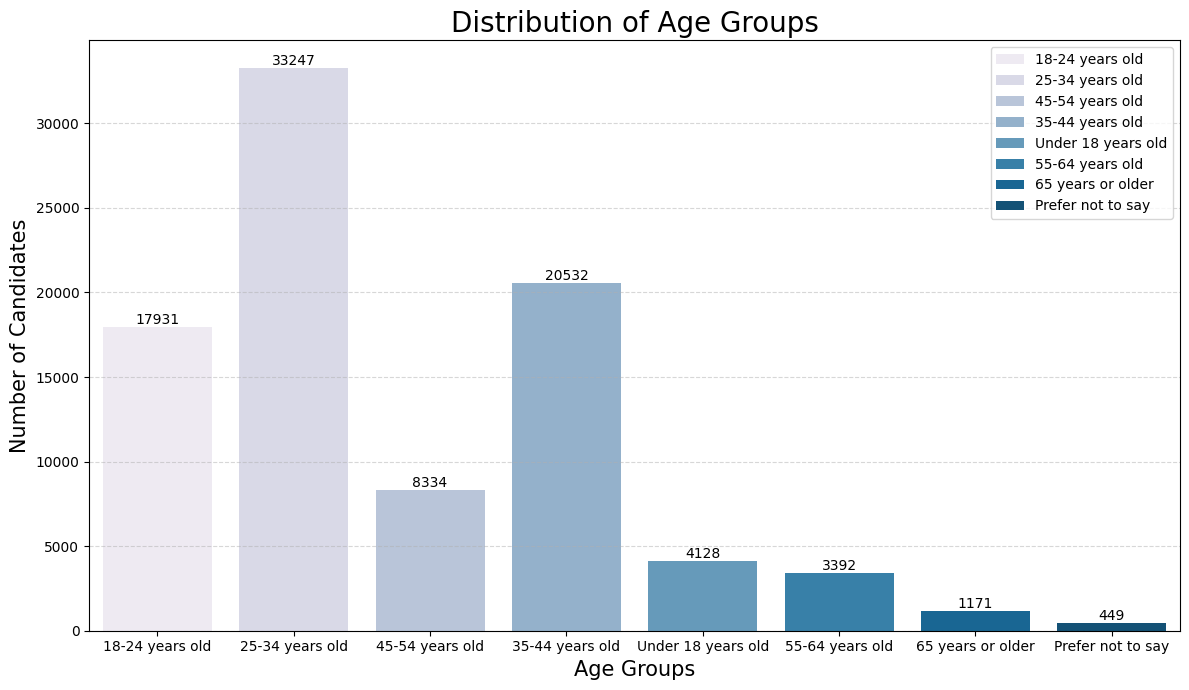

In [188]:
ageDistributions = dict(data['Age'].value_counts(sort=False))
ageRegexPattern = r'^([\d]{2})-([\d]{2})'

# for ageGrp in data['Age']:
#     result = re.search(ageRegexPattern, ageGrp)
#     if result:
#         ages = result.group(0)
#         ageDistributions[ages] = ageDistributions.get(ages, 0) + 1
#     else:
#         pass

# Extracting labels and counts
ageLabels = list(ageDistributions.keys())
counts = list(ageDistributions.values())


# Bar Plot
plt.figure(figsize=(12, 7))
sns.barplot(x=ageLabels, y=counts, hue=ageLabels, palette="PuBu", dodge=False, legend=True)

# Adding data labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel("Age Groups", fontsize=15)
plt.ylabel("Number of Candidates", fontsize=15)
plt.title("Distribution of Age Groups", fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


> <em>CONCLUSION: People under 25 - 34 years age group are most prominent participants in the survey, along with 18 - 24 year group & 35 - 44 year groups. Older people are less in participation. </em>

### <i>*- Popularity of Programming Languages or Most used Programming Language in 2023 -*</i>

In [189]:
languages = data['LanguageHaveWorkedWith'].dropna()

# populate dict 
progLangDict = {}
for i in languages:
    splitted = i.split(';')
    for j in splitted:
        progLangDict[j] = progLangDict.get(j, 0) + 1

progLangDict = dict(sorted(progLangDict.items(), key=operator.itemgetter(1), reverse=True))

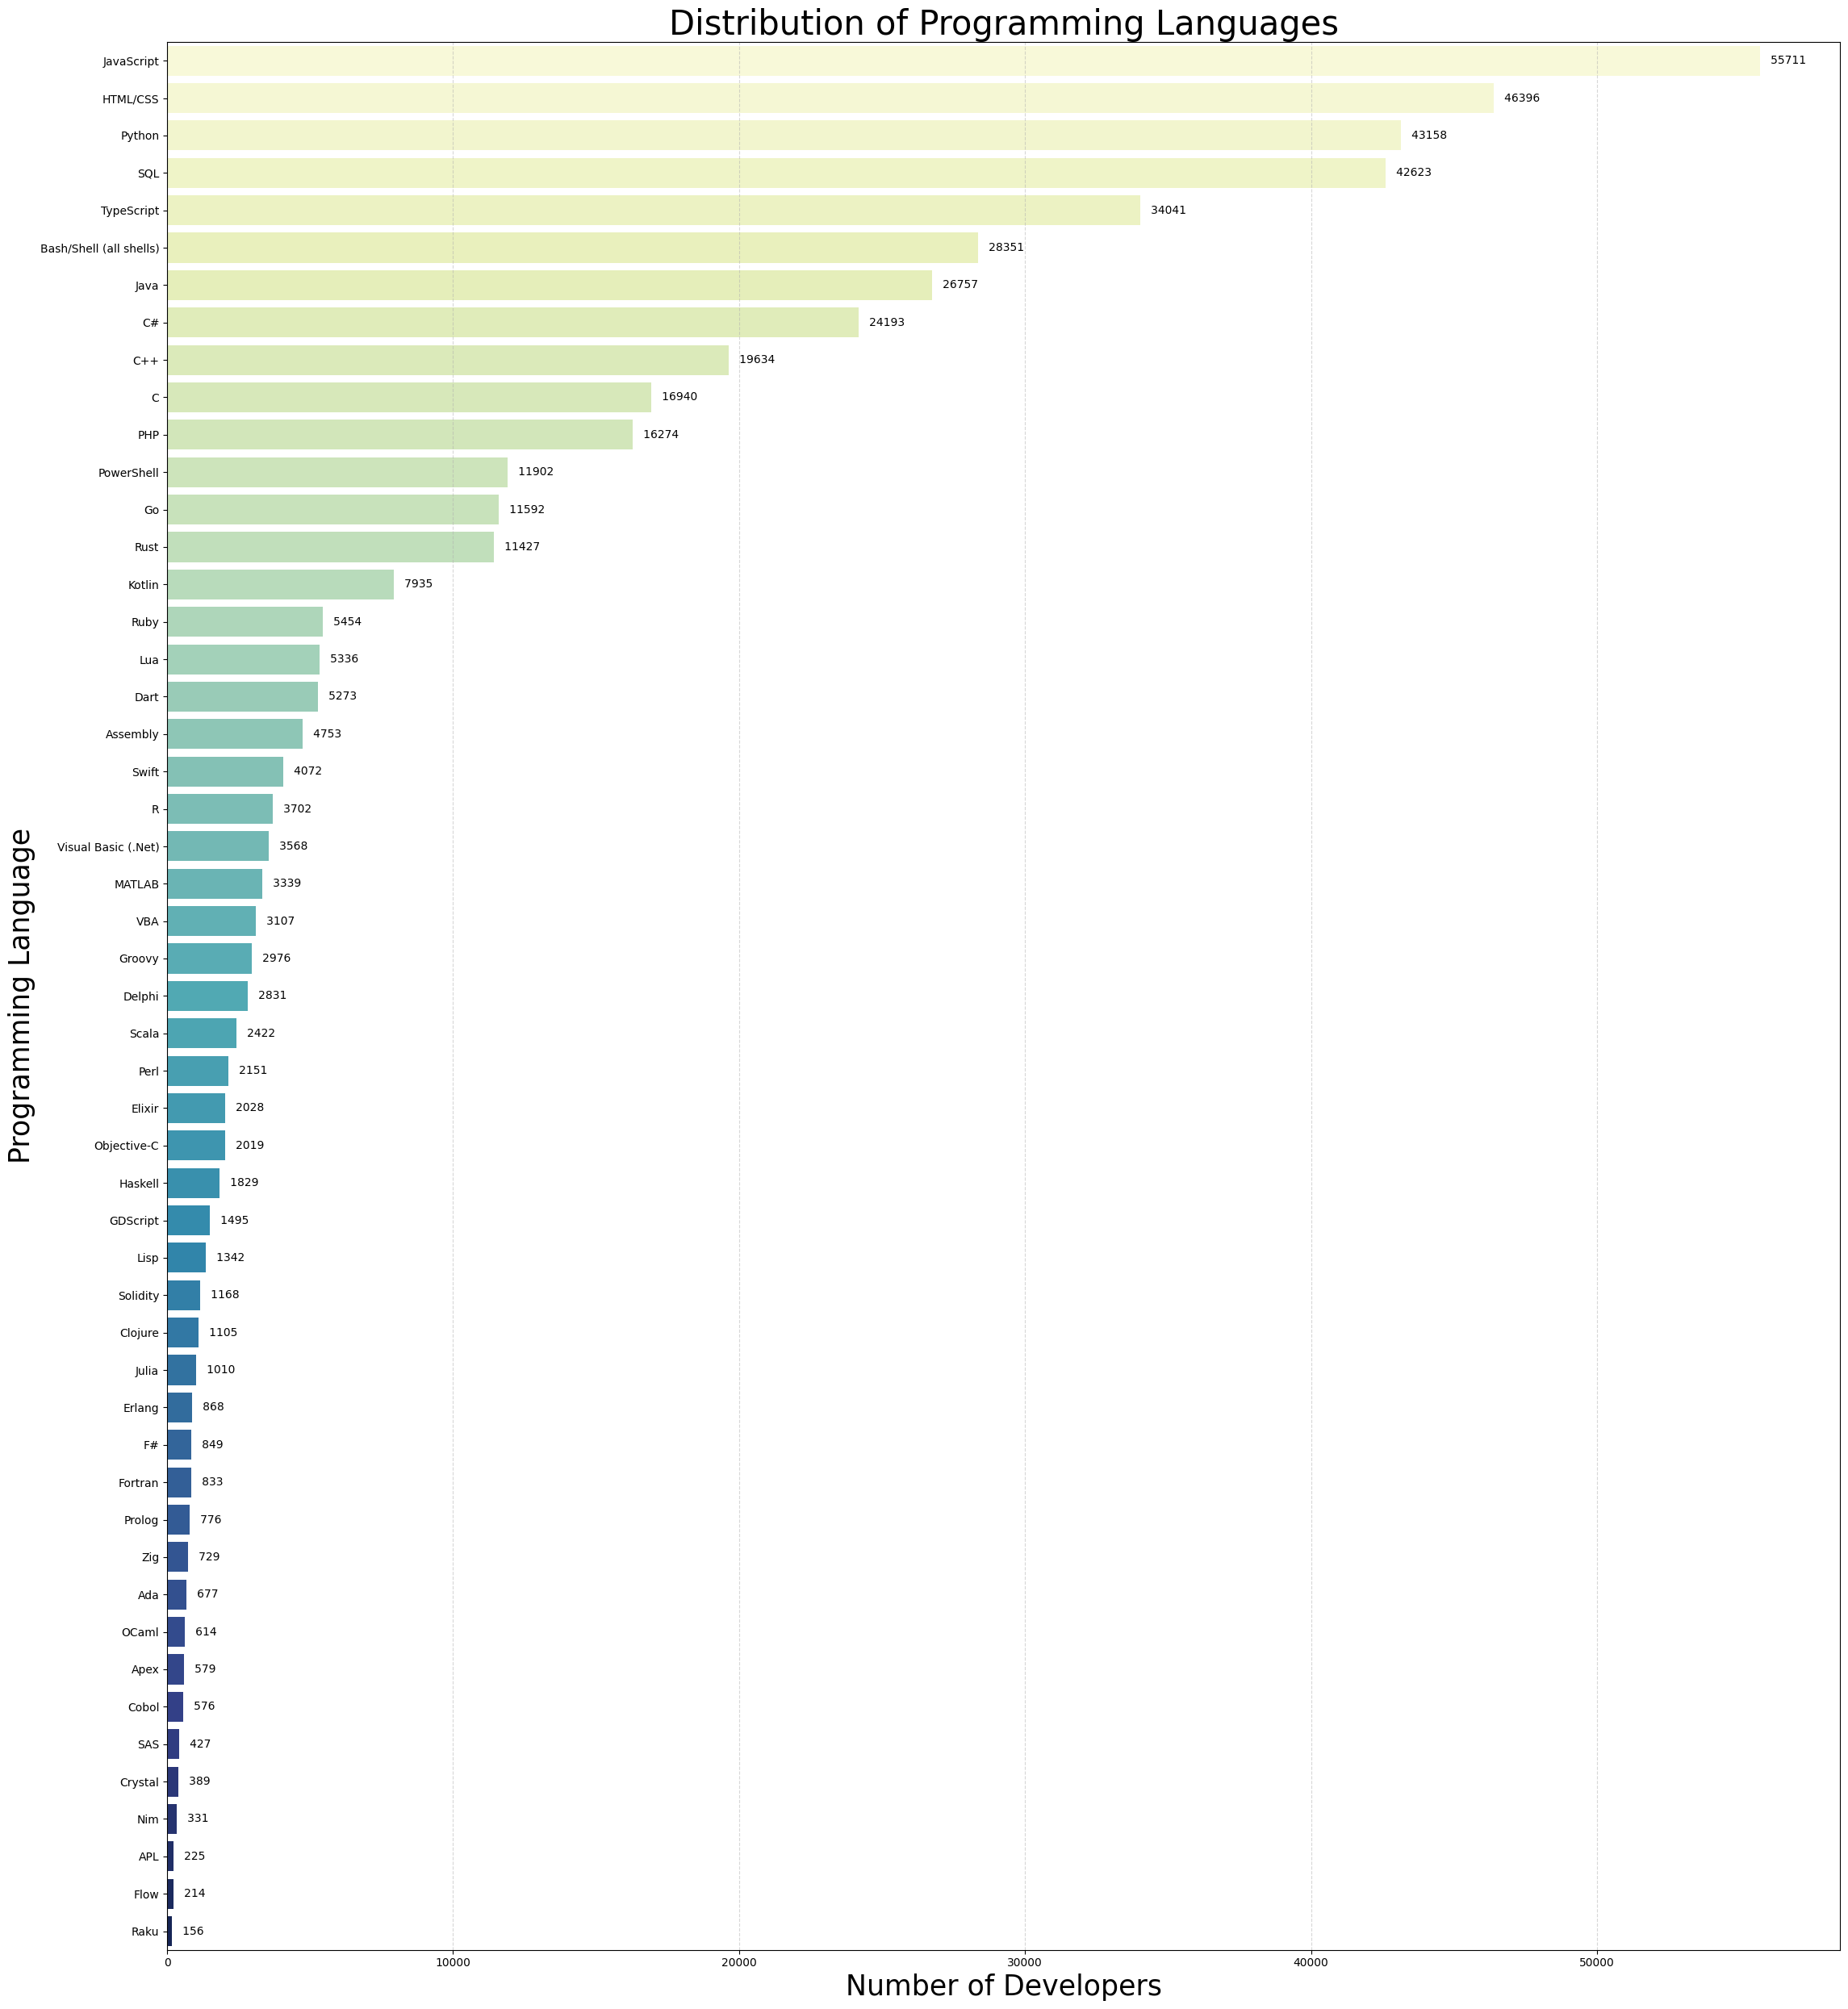

In [190]:
progLanguage = list(progLangDict.keys())
counts = list(progLangDict.values())

plt.figure(figsize=(23, 25))
bar_plot = sns.barplot(x=counts, y=progLanguage, hue=progLanguage, palette="YlGnBu", dodge=False)

# Adding data labels inside the bars
for i, count in enumerate(counts):
    bar_plot.text(count, i, f'   {count}', ha='left', va='center', fontsize=10)

plt.xlabel("Number of Developers", fontsize=25)
plt.ylabel("Programming Language", fontsize=25)
plt.title("Distribution of Programming Languages", fontsize=30)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


> <em>CONCLUSION: From the above graph we can see that languages prominent in Web Development such as HTML, CSS, Javascript, Typescript are one of the most Popular. Multipurpose languages like Python has also gained lot of popularity due to its vast applications in DataScience and Machine Learning. Database Query language like SQL has also made to the top 5 in the list. </em>

#### Percentage of people knowing a particular Language grouped by country: 

In [191]:
country_grp = data.groupby('Country')

# Enter any Language
language = 'TypeScript' 

numRespondents = data['Country'].value_counts()
numKnowLanguage = country_grp['LanguageHaveWorkedWith'].apply(lambda x: (x.str.contains(f"{language}")).sum()).sort_values(ascending=False)
lang_df = pd.concat([numRespondents, numKnowLanguage], axis='columns', sort=False)
lang_df.columns = ['Total_People', f'Know_{language}']
lang_df[r'%_KnowLang'] = round((lang_df[f'Know_{language}'] / lang_df['Total_People']) * 100, 3)
lang_df.head(10)
# lang_df['%_KnowLang'].max()

,Total_People,Know_TypeScript,%_KnowLang
Country,,,
United States of America,18647,7394,39.652
Germany,7328,2950,40.257
India,5625,1732,30.791
United Kingdom of Great Britain and Northern Ireland,5552,2087,37.590
Canada,3507,1421,40.519
France,2933,1224,41.732
Poland,2435,964,39.589
Netherlands,2383,1024,42.971
Australia,2078,893,42.974


### <i>*- Median <strong>Salary</strong> Earned in top 3 paid countries for each designation -*</i>

In [192]:
# Percentage of People Who haven`t disclosed their salary
salaryNotConveyed = (data['Salary'].count()/len(data['Salary'])) * 100
print(f"{round(salaryNotConveyed, 2)}% have not disclosed their Salary.")

54.07% have not disclosed their Salary.


In [193]:
salaryData = data['Salary'].dropna()
data.groupby('Country')

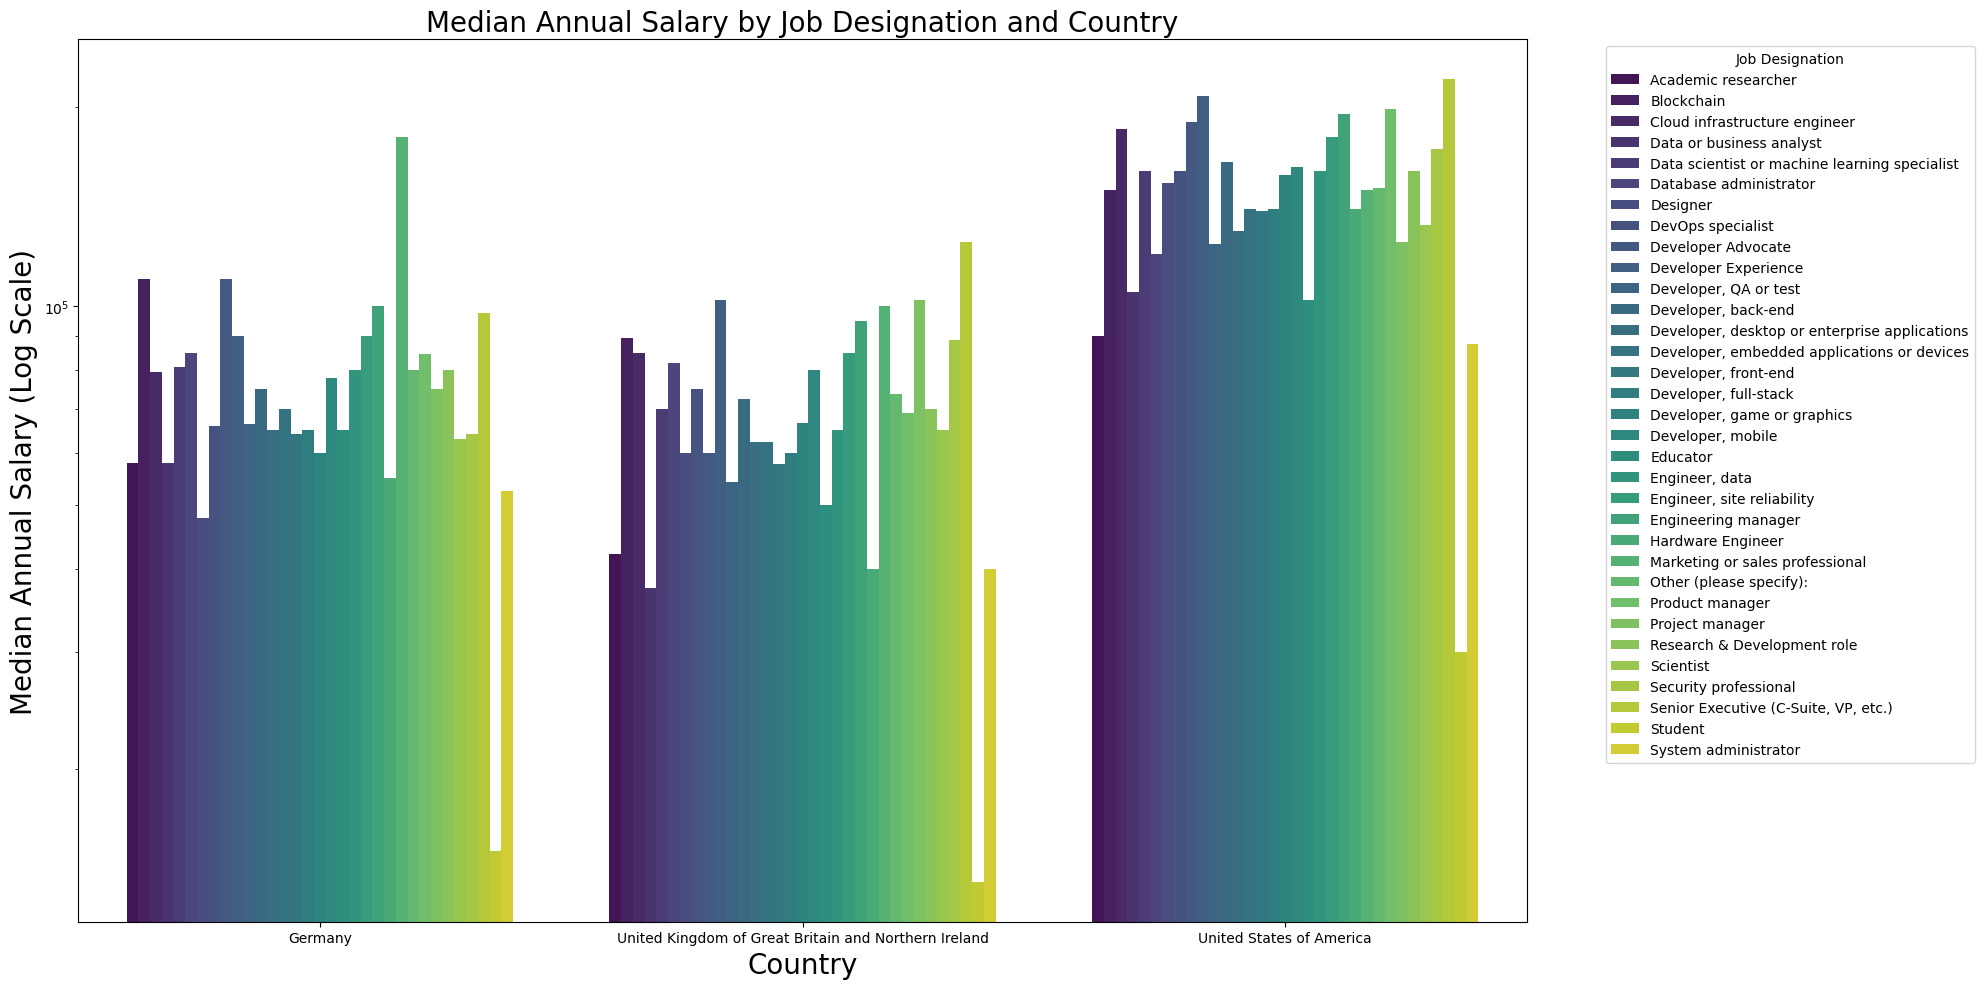

In [194]:
filtered_data = data.dropna(subset=['Salary'])
# Adjusted for Salary

# Group by Country and DevType
grouped_data = filtered_data.groupby(['Country', 'DevType'])['Salary'].median().reset_index()

top_countries = filtered_data['Country'].value_counts().head(3).index
top_grouped_data = grouped_data[grouped_data['Country'].isin(top_countries)]
country = grouped_data.groupby('Country')
india_data = country.get_group('India')
usa_data = country.get_group('United States of America')
list_of_countries_data = [india_data, usa_data]

# for i in country:
#     print(i)

plt.figure(figsize=(20, 10))
sns.barplot(x='Country', y='Salary', hue='DevType', data=top_grouped_data, errorbar=None, palette='viridis')
plt.yscale('log')  
plt.xlabel('Country', fontsize=20)
plt.ylabel('Median Annual Salary (Log Scale)', fontsize=20)
plt.title('Median Annual Salary by Job Designation and Country', fontsize=20)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Job Designation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> <em>CONCLUSION: From above Observation we can see that United States of America on an Average Pays more to each of the designation listed. In germany however, Marketing and Sales Managers are payed much more than other tech designations. The lowest earners are the System Administrators in each cases (Student not considered), while the earning fields are BlockChain, Cloud and Data Engineers or any field related to data analysis or engineering.</em>

### <i>*- Relation of Work Experience and Salary Earned -*</i>

In [195]:
salAndCountry = data[['Total_Salary', 'YearsCode', 'YearsCodePro', 'WorkExp','Currency', 'Country']].dropna()
groupedSalData = salAndCountry.groupby('Country')

# regex pattern 
pattern = r'^([A-Z]{3})'
for i in salAndCountry['Currency']:
    res = re.search(pattern, i)
#     print(*res.groups(1))
    
salAndCountry

,Total_Salary,YearsCode,YearsCodePro,WorkExp,Currency,Country
ResponseId,,,,,,
2,285000.0,18,9,10.0,USD\tUnited States dollar,United States of America
3,250000.0,27,23,23.0,USD\tUnited States dollar,United States of America
4,156000.0,12,7,7.0,USD\tUnited States dollar,United States of America
5,23456.0,6,4,6.0,PHP\tPhilippine peso,Philippines
6,96828.0,21,21,22.0,GBP\tPound sterling,United Kingdom of Great Britain and Northern I...
...,...,...,...,...,...,...
89163,50719.0,30,24,25.0,BRL\tBrazilian real,Brazil
89167,16917.0,7,2,3.0,AMD\tArmenian dram,Armenia
89168,15752.0,6,2,2.0,INR\tIndian rupee,India


### <i>*- Influence of AI and DevAI : Most Used AI For Search and For Web development -*</i>

In [196]:
aiUsed = populateDict(data['AISearchHaveWorkedWith'], delimiter=';')
devAiUsed = populateDict(data['AIDevHaveWorkedWith'], delimiter=';')

In [197]:
# convert to DataFrames
df_ai_search = pd.DataFrame(list(aiUsed.items()), columns=['AI Search Tool', 'Count'])
df_ai_dev = pd.DataFrame(list(devAiUsed.items()), columns=['AI Dev Tool', 'Count'])

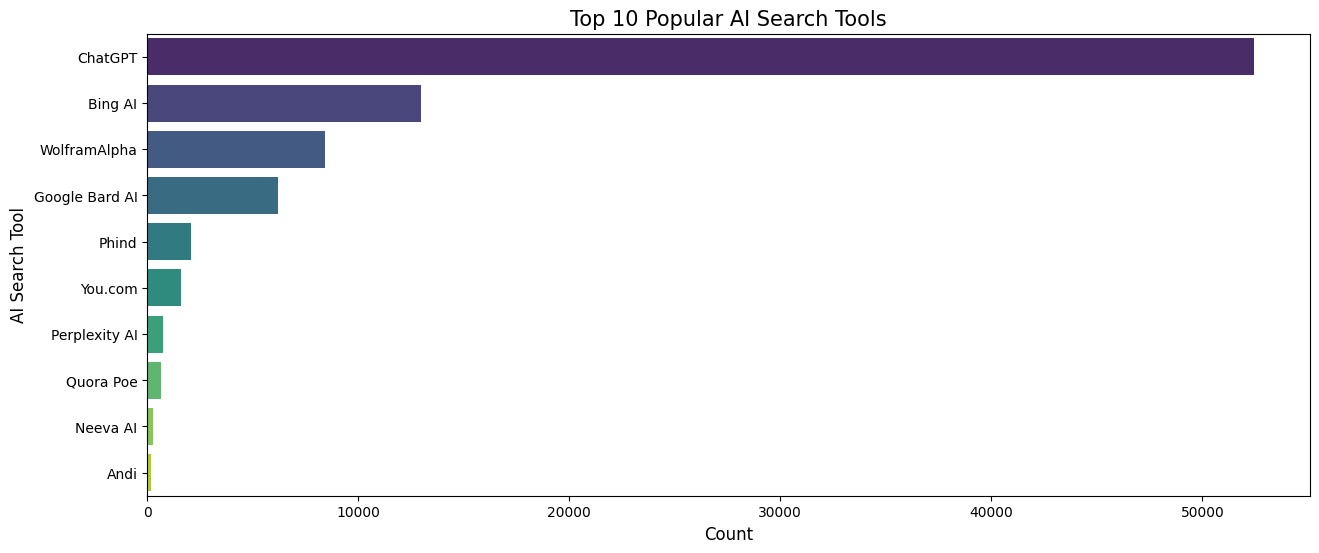

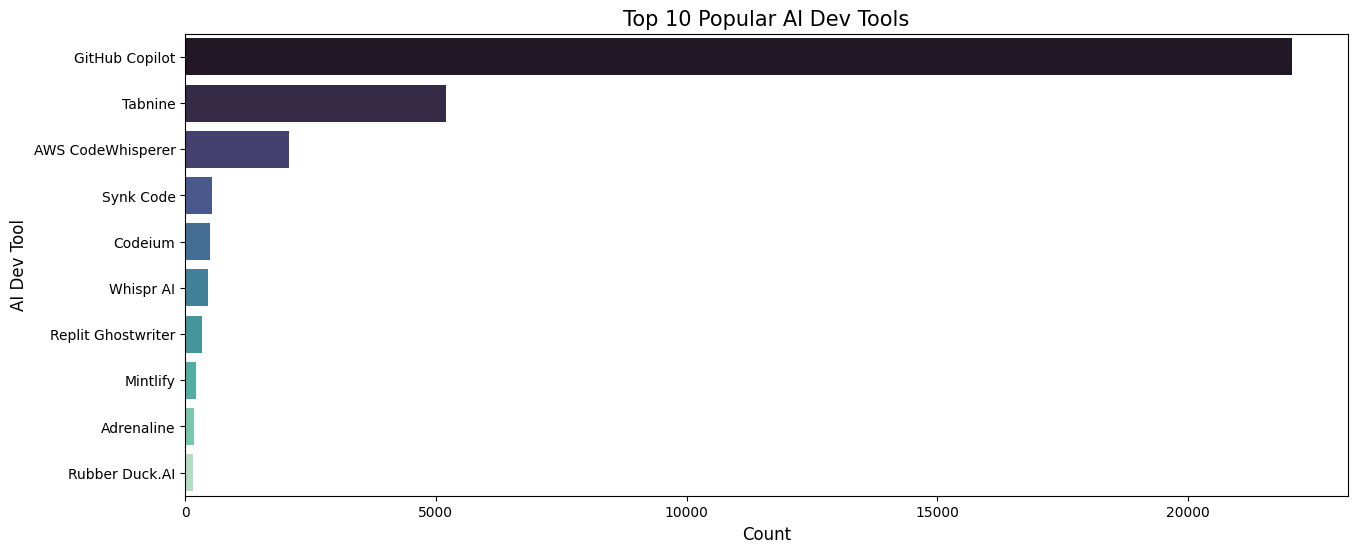

In [198]:
# Plotting AI Search Tools
plt.figure(figsize=(15, 6))
sns.barplot(x='Count', y='AI Search Tool', data=df_ai_search.sort_values(by='Count', ascending=False).head(10), hue='AI Search Tool',palette='viridis')
plt.title('Top 10 Popular AI Search Tools', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('AI Search Tool', fontsize=12)
plt.show()

# Plotting AI Dev Tools
plt.figure(figsize=(15, 6))
sns.barplot(x='Count', y='AI Dev Tool', data=df_ai_dev.sort_values(by='Count', ascending=False).head(10), hue='AI Dev Tool',palette='mako')
plt.title('Top 10 Popular AI Dev Tools', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('AI Dev Tool', fontsize=12)
plt.show()

> <em> CONCLUSION:  From Above Observation can see that AI search Tools like ChatGPT and AI dev Tools like GitHub Copilot are more significantly used than their counterparts. Wolfram Alpha which is mostly used for MathWorks and complex math calculations and analysis also made it to top 3 spot. </em>

### -- <i>VIEWING DATA SET AND ATTRIBUTES</i> --

In [199]:
data.shape

(89184, 82)

In [200]:
data['LearnCode']

ResponseId
1                                                      NaN
2        Books / Physical media;Colleague;Friend or fam...
3        Books / Physical media;Colleague;On the job tr...
4        Colleague;Friend or family member;Other online...
5        Books / Physical media;Online Courses or Certi...
                               ...                        
89180    Online Courses or Certification;Other online r...
89181    Colleague;Online Courses or Certification;Othe...
89182    Books / Physical media;Hackathons (virtual or ...
89183    Online Courses or Certification;Other online r...
89184    Colleague;Online Courses or Certification;Othe...
Name: LearnCode, Length: 89184, dtype: object

In [202]:
salAndCountry = data[['Total_Salary', 'Country', 'Currency']].dropna()
groupedSalData = salAndCountry.groupby('Country')
medianSalData = dict(groupedSalData['Total_Salary'].median()) # not adjusted for currency
pattern = r'^[A-Z]{3}'
for i in groupedSalData:
    currencyData = pd.DataFrame(i[1]['Currency'])
    print(currencyData.head(1))
#     result = re.search(pattern, i[])

                       Currency
ResponseId                     
1335        AFN\tAfghan afghani
                      Currency
ResponseId                    
19          AMD\tArmenian dram
                       Currency
ResponseId                     
3642        DZD\tAlgerian dinar
                     Currency
ResponseId                   
1497        EUR European Euro
                       Currency
ResponseId                     
33667       AOA\tAngolan kwanza
                       Currency
ResponseId                     
88205       AOA\tAngolan kwanza
                             Currency
ResponseId                           
45          USD\tUnited States dollar
                      Currency
ResponseId                    
997         AMD\tArmenian dram
                          Currency
ResponseId                        
12          AUD\tAustralian dollar
                     Currency
ResponseId                   
102         EUR European Euro
                         Curren

In [ ]:
data.isna().sum()

In [ ]:
len(data.columns), (data.columns)

In [ ]:
data[['AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith']].head(30).dropna()
data['Industry'].head(30).dropna()

In [ ]:
schema.loc[71, 'question']

In [ ]:
country_grp = data.groupby('Country')
filt = data['Country'] == 'India'
data[filt]['LanguageHaveWorkedWith'].str.contains('Python').sum()

In [ ]:
language = 'Python'
numRespondents = data['Country'].value_counts()
numKnowLanguage = country_grp['LanguageHaveWorkedWith'].apply(lambda x: (x.str.contains(f"{language}")).sum()).sort_values(ascending=False)
lang_df = pd.concat([numRespondents, numKnowLanguage], axis='columns', sort=False)
lang_df.columns = ['Total_People', f'{language}']
lang_df['P_KnowLang'] = round((lang_df[f'{language}'] / lang_df['Total_People']) * 100, 3)
lang_df